# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

ENEM 2016 - Data from ENEM 2016, the Brazilian High School National Exam. 
Disponível em https://www.kaggle.com/gbonesso/enem-2016
Exploração de dados sobre resultados do ENEM (entrantes do ensino superior) pode auxiliar projetos de pesquisa em desenvolvimento no LATACI Research Institute, onde atuo.
O arquivo original possui mais de 8 milhões de linhas, e optei por gerar um com apenas 15 mil linhas para este projeto.
Função create_subset() disponível em maxpy

In [6]:
import pandas as pd
import numpy as np
from maxpy import *

arquivo = create_subset("microdados_enem_2016.csv", 15000)

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- O arquivo original possui 166 colunas. Para este projeto, serão selecionados estados e municípios de residência e de realização das provas; idade; sexo; se é treineiro ou não; os códigos (tipos) e as notas de Ciências da Natureza (CN), Ciências Humanas (CH), Linguagens e Códigos (LC), Matemática (MAT) e redação; se possui dislexia, discalculia ou algum outro tipo de deficiência (baixa visão, cegueira, surdez, deficiência auditiva, surdo e cego, deficiência física, déficit de atenção, autismo, visão monocular, outra deficiência). Os tipos de deficiência seguem as colunas definidas no arquivo. O arquivo agora possui 19 colunas.
- Todas as variáveis selecionadas são discretas, exceto as notas.


In [7]:
enem2016 = pd.read_csv(arquivo, encoding = "ISO-8859-1")

print(enem2016.info())
print(enem2016.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 166 entries, NU_INSCRICAO to Q050
dtypes: float64(36), int64(75), object(55)
memory usage: 19.0+ MB
None
NU_INSCRICAO               15000
NU_ANO                     15000
CO_MUNICIPIO_RESIDENCIA    15000
NO_MUNICIPIO_RESIDENCIA    15000
CO_UF_RESIDENCIA           15000
SG_UF_RESIDENCIA           15000
NU_IDADE                   15000
TP_SEXO                    15000
TP_ESTADO_CIVIL            14271
TP_COR_RACA                15000
TP_NACIONALIDADE           15000
CO_MUNICIPIO_NASCIMENTO    14585
NO_MUNICIPIO_NASCIMENTO    14585
CO_UF_NASCIMENTO           14585
SG_UF_NASCIMENTO           14585
TP_ST_CONCLUSAO            15000
TP_ANO_CONCLUIU            15000
TP_ESCOLA                  15000
TP_ENSINO                   1244
IN_TREINEIRO               15000
CO_ESCOLA                   1244
CO_MUNICIPIO_ESC            1244
NO_MUNICIPIO_ESC            1244
CO_UF_ESC                   1244
SG_UF_ESC         

In [8]:
# Excluir colunas

colunas = ["NU_INSCRICAO", "NU_ANO", "CO_MUNICIPIO_RESIDENCIA", "CO_UF_RESIDENCIA", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_NACIONALIDADE", "CO_MUNICIPIO_NASCIMENTO", "NO_MUNICIPIO_NASCIMENTO", "CO_UF_NASCIMENTO", "SG_UF_NASCIMENTO", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "TP_ESCOLA", "TP_ENSINO", "CO_ESCOLA", "CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC", "CO_UF_ESC", "SG_UF_ESC", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC", "TP_SIT_FUNC_ESC", "IN_SABATISTA", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", "IN_SEM_RECURSO", "IN_BRAILLE", "IN_AMPLIADA_24", "IN_AMPLIADA_18", "IN_LEDOR", "IN_ACESSO", "IN_TRANSCRICAO", "IN_LIBRAS", "IN_LEITURA_LABIAL", "IN_MESA_CADEIRA_RODAS", "IN_MESA_CADEIRA_SEPARADA", "IN_APOIO_PERNA", "IN_GUIA_INTERPRETE", "IN_MACA", "IN_COMPUTADOR", "IN_CADEIRA_ESPECIAL", "IN_CADEIRA_CANHOTO", "IN_CADEIRA_ACOLCHOADA", "IN_PROVA_DEITADO", "IN_MOBILIARIO_OBESO", "IN_LAMINA_OVERLAY", "IN_PROTETOR_AURICULAR", "IN_MEDIDOR_GLICOSE", "IN_MAQUINA_BRAILE", "IN_SOROBAN", "IN_MARCA_PASSO", "IN_SONDA", "IN_MEDICAMENTOS", "IN_SALA_INDIVIDUAL", "IN_SALA_ESPECIAL", "IN_SALA_ACOMPANHANTE", "IN_MOBILIARIO_ESPECIFICO", "IN_MATERIAL_ESPECIFICO", "IN_NOME_SOCIAL", "IN_CERTIFICADO", "NO_ENTIDADE_CERTIFICACAO", "CO_UF_ENTIDADE_CERTIFICACAO", "SG_UF_ENTIDADE_CERTIFICACAO", "CO_MUNICIPIO_PROVA", "CO_UF_PROVA", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TP_LINGUA", "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT", "TP_STATUS_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019", "Q020", "Q021", "Q022", "Q023", "Q024", "Q025", "Q026", "Q027", "Q028", "Q029", "Q030", "Q031", "Q032", "Q033", "Q034", "Q035", "Q036", "Q037", "Q038", "Q039", "Q040", "Q041", "Q042", "Q043", "Q044", "Q045", "Q046", "Q047", "Q048", "Q049", "Q050"]
drop_columns(enem2016, colunas)

print(enem2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
NO_MUNICIPIO_RESIDENCIA    15000 non-null object
SG_UF_RESIDENCIA           15000 non-null object
NU_IDADE                   15000 non-null int64
TP_SEXO                    15000 non-null object
IN_TREINEIRO               15000 non-null int64
IN_BAIXA_VISAO             15000 non-null int64
IN_CEGUEIRA                15000 non-null int64
IN_SURDEZ                  15000 non-null int64
IN_DEFICIENCIA_AUDITIVA    15000 non-null int64
IN_SURDO_CEGUEIRA          15000 non-null int64
IN_DEFICIENCIA_FISICA      15000 non-null int64
IN_DEFICIENCIA_MENTAL      15000 non-null int64
IN_DEFICIT_ATENCAO         15000 non-null int64
IN_DISLEXIA                15000 non-null int64
IN_DISCALCULIA             15000 non-null int64
IN_AUTISMO                 15000 non-null int64
IN_VISAO_MONOCULAR         15000 non-null int64
IN_OUTRA_DEF               15000 non-null int64
NO_MUNICIPIO_PROVA      

In [9]:
# Testar valores únicos de IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DEFICIENCIA_AUDITIVA, IN_SURDO_CEGUEIRA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_MENTAL, IN_DEFICIT_ATENCAO, IN_AUTISMO, IN_VISAO_MONOCULAR, IN_OUTRA_DEF
unique_values(enem2016, 'IN_BAIXA_VISAO')
unique_values(enem2016, 'IN_CEGUEIRA')
unique_values(enem2016, 'IN_SURDEZ')
unique_values(enem2016, 'IN_DEFICIENCIA_AUDITIVA')
unique_values(enem2016, 'IN_SURDO_CEGUEIRA')
unique_values(enem2016, 'IN_DEFICIENCIA_FISICA')
unique_values(enem2016, 'IN_DEFICIENCIA_MENTAL')
unique_values(enem2016, 'IN_DEFICIT_ATENCAO')
unique_values(enem2016, 'IN_AUTISMO')
unique_values(enem2016, 'IN_VISAO_MONOCULAR')
unique_values(enem2016, 'IN_OUTRA_DEF')


Valores distintos de IN_BAIXA_VISAO [0 1]
Valores distintos de IN_CEGUEIRA [0 1]
Valores distintos de IN_SURDEZ [0 1]
Valores distintos de IN_DEFICIENCIA_AUDITIVA [0 1]
Valores distintos de IN_SURDO_CEGUEIRA [0 1]
Valores distintos de IN_DEFICIENCIA_FISICA [0 1]
Valores distintos de IN_DEFICIENCIA_MENTAL [0 1]
Valores distintos de IN_DEFICIT_ATENCAO [0 1]
Valores distintos de IN_AUTISMO [0 1]
Valores distintos de IN_VISAO_MONOCULAR [0 1]
Valores distintos de IN_OUTRA_DEF [0 1]


In [10]:
# Agrupar as colunas de outras deficiências em uma única coluna
enem2016['outra_def'] = 'NaN'
for index, row in enem2016.iterrows():
    enem2016.loc[index,'outra_def'] = bool(enem2016.loc[index, 'IN_BAIXA_VISAO']) or bool(enem2016.loc[index, 'IN_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_SURDEZ']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_AUDITIVA']) or bool(enem2016.loc[index, 'IN_SURDO_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_FISICA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_MENTAL']) or bool(enem2016.loc[index, 'IN_DEFICIT_ATENCAO']) or bool(enem2016.loc[index, 'IN_AUTISMO']) or bool(enem2016.loc[index, 'IN_VISAO_MONOCULAR']) or bool(enem2016.loc[index, 'IN_OUTRA_DEF'])

# Selecionar colunas
enem2016 = enem2016[['NU_IDADE', 'TP_SEXO', 'IN_TREINEIRO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'outra_def', 'CO_PROVA_CN', 'NU_NOTA_CN', 'CO_PROVA_CH', 'NU_NOTA_CH', 'CO_PROVA_LC', 'NU_NOTA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# Renomear colunas
enem2016.columns = ['idade', 'sexo', 'treineiro', 'munic_resid', 'uf_resid', 'munic_prova', 'uf_prova', 'dislexia', 'discalculia', 'outra_def', 'cod_prova_cn', 'nota_cn', 'cod_prova_ch', 'nota_ch', 'cod_prova_lc', 'nota_lc', 'cod_prova_mat', 'nota_mat', 'nota_redacao']

print(enem2016.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
idade            15000 non-null int64
sexo             15000 non-null object
treineiro        15000 non-null int64
munic_resid      15000 non-null object
uf_resid         15000 non-null object
munic_prova      15000 non-null object
uf_prova         15000 non-null object
dislexia         15000 non-null int64
discalculia      15000 non-null int64
outra_def        15000 non-null bool
cod_prova_cn     11128 non-null float64
nota_cn          11128 non-null float64
cod_prova_ch     11128 non-null float64
nota_ch          11128 non-null float64
cod_prova_lc     10856 non-null float64
nota_lc          10856 non-null float64
cod_prova_mat    10856 non-null float64
nota_mat         10856 non-null float64
nota_redacao     10856 non-null float64
dtypes: bool(1), float64(9), int64(4), object(5)
memory usage: 2.1+ MB
None


*Descrição da base e suas variáveis*

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [11]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Calcular número de linhas e colunas
# Listar features e seu tipo de dados
print(enem2016.info())

# Existe consistência no número de linhas com valores não nulos de cod_prova_cn, nota_cn, cod_prova_ch e nota_ch, e de cod_prova_lc, nota_lc, cod_prova_mat, nota_mat e nota_redacao.
# A diferença do número de linhas aparentemente se justifica por desistência no segundo dia, pois as provas de CN e CH foram realizadas no dia 05/11/16, e as de LC, MAT e Redação no dia 06/11/2016, conforme veiculado em https://www.enem.vestibulandoweb.com.br/data-enem-2016.html
# As linhas sem todas as provas serão eliminadas no pré-processamento


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
idade            15000 non-null int64
sexo             15000 non-null object
treineiro        15000 non-null int64
munic_resid      15000 non-null object
uf_resid         15000 non-null object
munic_prova      15000 non-null object
uf_prova         15000 non-null object
dislexia         15000 non-null int64
discalculia      15000 non-null int64
outra_def        15000 non-null bool
cod_prova_cn     11128 non-null float64
nota_cn          11128 non-null float64
cod_prova_ch     11128 non-null float64
nota_ch          11128 non-null float64
cod_prova_lc     10856 non-null float64
nota_lc          10856 non-null float64
cod_prova_mat    10856 non-null float64
nota_mat         10856 non-null float64
nota_redacao     10856 non-null float64
dtypes: bool(1), float64(9), int64(4), object(5)
memory usage: 2.1+ MB
None


In [13]:
# PRÉ-PROCESSAMENTO DE CADA UMA DAS 19 FEATURES - ANÁLISE INICIAL

# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_cn'])
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_ch'])
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_lc'])
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_mat'])

# 1. idade
unique_values(enem2016, 'idade')

# 2. sexo
unique_values(enem2016, 'sexo')

# 3. treineiro
unique_values(enem2016, 'treineiro')

# 4 e 5. munic_resid e uf_resid
unique_values(enem2016, 'uf_resid')

# 6 e 7. munic_prova e uf_prova
unique_values(enem2016, 'uf_prova')

# 8. dislexia
unique_values(enem2016, 'dislexia')

# 9. discalculia
unique_values(enem2016, 'discalculia')

# 10. outra_def
unique_values(enem2016, 'outra_def')

# 11 e 12. cod_prova_cn e nota_cn
unique_values(enem2016, 'cod_prova_cn')

# 13 e 14. cod_prova_ch e nota_ch
unique_values(enem2016, 'cod_prova_ch')

# 15 e 16. cod_prova_lc e nota_lc
unique_values(enem2016, 'cod_prova_lc')

# 17 e 18. cod_prova_mat e nota_mat
unique_values(enem2016, 'cod_prova_mat')

# 19. nota_redacao


# Resumo
print(enem2016.info())

Valores distintos de idade [23 20 21 17 19 29 60 16 18 24 26 22 25 28 30 36 32 33 34 41 50 31 15 37
 27 42 64 35 39 45 40 38 44 47 43 46 59 13 49 52 55 51 57 62 53 58 48 56
 54 14 63 66 78 65 68 61 67]
Valores distintos de sexo ['M' 'F']
Valores distintos de treineiro [0 1]
Valores distintos de uf_resid ['PB' 'PR' 'BA' 'PA' 'CE' 'SP' 'RJ' 'RN' 'PE' 'ES' 'MS' 'GO' 'SE' 'MT'
 'PI' 'RS' 'AL' 'MG' 'DF' 'AM' 'MA' 'SC' 'RO' 'RR' 'TO' 'AP' 'AC']
Valores distintos de uf_prova ['PB' 'PR' 'BA' 'PA' 'CE' 'SP' 'RJ' 'RN' 'PE' 'ES' 'MS' 'GO' 'SE' 'MT'
 'PI' 'RS' 'AL' 'DF' 'MG' 'SC' 'AM' 'MA' 'RO' 'RR' 'TO' 'AP' 'AC']
Valores distintos de dislexia [0 1]
Valores distintos de discalculia [0]
Valores distintos de outra_def [False  True]
Valores distintos de cod_prova_cn [292. 294. 291. 351. 293. 352. 353. 354. 334.]
Valores distintos de cod_prova_ch [296. 298. 295. 356. 297. 357. 358. 359. 339.]
Valores distintos de cod_prova_lc [300. 301. 299. 302. 364. 362. 363. 361.]
Valores distintos de cod_prova_ma

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


0 a 30: 87.15% - 9430 de 10820 registros 
31 a 59: 12.69% - 1373 de 10820 registros 
60+: 0.16% - 17 de 10820 registros


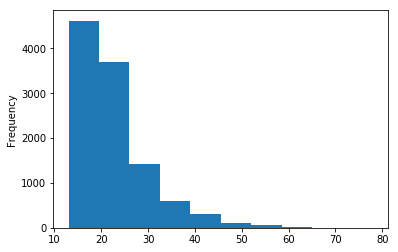

In [14]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

# Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?
faixa_etaria = {'0-30':0, '31-59':0, '60+':0}
total = 0
for idade in enem2016['idade']:
    total += 1
    if idade < 31:
        faixa_etaria['0-30'] += 1
    elif idade < 60:
        faixa_etaria['31-59'] += 1
    else:
        faixa_etaria['60+'] += 1

perc_0_30 = 100 * faixa_etaria['0-30'] / total
perc_31_59 = 100 * faixa_etaria['31-59'] / total
perc_60 = 100 * faixa_etaria['60+'] / total

print(f'0 a 30: {perc_0_30:.2f}% - {faixa_etaria["0-30"]} de {total} registros \n31 a 59: {perc_31_59:.2f}% - {faixa_etaria["31-59"]} de {total} registros \n60+: {perc_60:.2f}% - {faixa_etaria["60+"]} de {total} registros')

# outro modo
bins = [0, 31, 60, np.inf]
labels = ["0-30", "31-59", "60+"]
enem2016["faixa_etaria"] = pd.cut(enem2016["idade"], bins, labels=labels)

# histograma
enem2016["idade"].plot(kind="hist")


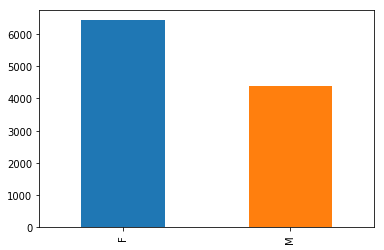

In [15]:
# Quantos % do conjunto de dados é do sexo feminino, quantos % é masculino?
enem2016["sexo"].value_counts().plot(kind="bar")

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [0]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

In [0]:
pandas_profiling.ProfileReport(enem2016)